In [5]:
import pandas as pd

Massachusetts_starting_df = pd.read_csv('Massachusetts_all_outages_2020_2023.csv')
Massachusetts_starting_df.head()

,fips_code,county,state,customers_out,run_start_time,Weekend,Season,month,hour,outage_id,duration_intervals,duration_minutes
0,25011,Franklin,Massachusetts,10.0,2020-01-01 00:00:00,0,3,1,0,0,32,480
1,25011,Franklin,Massachusetts,2.0,2020-01-01 16:30:00,0,3,1,16,1,5,75
2,25011,Franklin,Massachusetts,19.0,2020-01-01 19:00:00,0,3,1,19,2,36,540
3,25011,Franklin,Massachusetts,1.0,2020-01-02 08:00:00,0,3,1,8,3,1,15
4,25011,Franklin,Massachusetts,20.0,2020-01-03 15:30:00,0,3,1,15,4,2,30


Month 1: data shape = (4539, 3)
Month 2: data shape = (4196, 3)
Month 3: data shape = (4559, 3)
Month 4: data shape = (3961, 3)
Month 5: data shape = (4640, 3)
Month 6: data shape = (4718, 3)
Month 7: data shape = (4547, 3)
Month 8: data shape = (4498, 3)
Month 9: data shape = (4313, 3)
Month 10: data shape = (4509, 3)
Month 11: data shape = (5007, 3)
Month 12: data shape = (4232, 3)


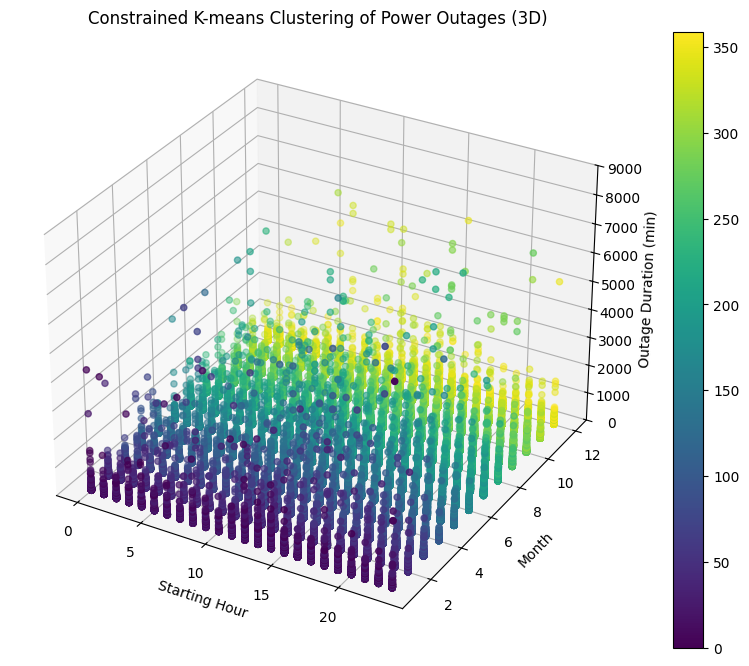

In [22]:
# Clustering by months
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Select the columns for clustering
clustering_columns = ['hour', 'duration_minutes', 'month']

# Create a new DataFrame with only the selected columns
X = Massachusetts_starting_df[clustering_columns]
# ... (previous code to create Massachusetts_starting_df) ...

# Separate data by month
monthly_data = {}
for month in Massachusetts_starting_df['month'].unique():
    monthly_data[month] = Massachusetts_starting_df[Massachusetts_starting_df['month'] == month][clustering_columns]

# Perform clustering for each month separately
for month, data in monthly_data.items():
    # Choose the number of clusters (k) for this month. You might want to adjust this based on the number of data points in each month.
    k_month = 30  # choose 30 clusters per default

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k_month, random_state=42)

    # Debugging: Print shape to check dimensions
    print(f"Month {month}: data shape = {data.shape}")

    # Fit the model to the data for this month
    kmeans.fit(data)

    # Assign cluster labels with an offset to avoid overlap between months
    Massachusetts_starting_df.loc[Massachusetts_starting_df['month'] == month, 'cluster'] = kmeans.labels_ + (month-1) * 30 

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(X['hour'], X['month'], X['duration_minutes'], c=Massachusetts_starting_df['cluster'], cmap='viridis')

# Set labels and title
ax.set_zlim(0, 9000)
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Month')
ax.set_zlabel('Outage Duration (min)')
ax.set_title('Constrained K-means Clustering of Power Outages (3D)')

# Add a colorbar
plt.colorbar(scatter)

# Show the plot
plt.show()

In [23]:
print(len(data['hour']), len(data['duration_minutes']), len(kmeans.labels_)) 
temp_df = pd.DataFrame({ ... })

4232 4232 4232


In [29]:
data['duration_minutes']

0       480
1        75
2       540
3        15
4        30
       ... 
4534     45
4535    285
4536    120
4537    180
4538     75
Name: duration_minutes, Length: 4539, dtype: int64

In [26]:
# Create an empty list to store cluster information for all months
all_clusters_data = []

# Perform clustering for each month separately and store cluster information
for month, data in monthly_data.items():
    # ... (Your existing code for KMeans fitting) ...
    # Reset the index of the data DataFrame
    data = data.reset_index(drop=True) 
    # Store cluster labels along with month information
    temp_df = pd.DataFrame({
        'hour': data['hour'],
        'duration_minutes': data['duration_minutes'],
        'month': month,
        'cluster': kmeans.labels_  # Use labels from the current iteration
    })
    all_clusters_data.append(temp_df)

# Concatenate all monthly cluster data into a single DataFrame
all_clusters_df = pd.concat(all_clusters_data)

# Group by 'cluster' and calculate overall statistics
cluster_stats = all_clusters_df.groupby('cluster').agg(['mean', 'median', 'count'])

# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count) * 100).round(2)

# Round the mean and median values to 2 decimal places
cluster_stats = cluster_stats.round(2)

# Display the cluster statistics
print("\nOverall Cluster Statistics:\n")
print(cluster_stats)

ValueError: array length 4232 does not match index length 4539

In [7]:
# ... (Your previous code for constrained clustering) ...

# Iterate through each month
for month in Massachusetts_starting_df['month'].unique():

    # Filter data for the current month
    month_data = Massachusetts_starting_df[Massachusetts_starting_df['month'] == month]

    # Group by 'cluster' and calculate statistics for this month
    cluster_stats_month = month_data.groupby('cluster')[['hour', 'duration_minutes']].agg(['mean', 'median', 'count'])

    # Calculate the total number of points for this month
    total_count_month = cluster_stats_month['hour']['count'].sum()

    # Calculate the percentage for each cluster within this month
    cluster_stats_month['percentage'] = ((cluster_stats_month['hour']['count'] / total_count_month) * 100).round(2)

    # Round the mean and median values to 2 decimal places
    cluster_stats_month = cluster_stats_month.round(2)

    # Display the cluster statistics for this month
    print(f"\nCluster Statistics for Month {month}:\n")
    print(cluster_stats_month)


Cluster Statistics for Month 1:

          hour              duration_minutes               percentage
          mean median count             mean  median count           
cluster                                                              
0.0       7.00    4.0    11          1459.09  1440.0    11       0.24
1.0      13.19   15.0   375            60.00    60.0   375       8.26
2.0      11.57   13.0    77           585.78   585.0    77       1.70
3.0       2.67    1.0     3          4240.00  4275.0     3       0.07
4.0      14.04   14.0   158           216.55   210.0   158       3.48
5.0      14.33   13.0     6          2302.50  2310.0     6       0.13
6.0      23.00   23.0     1          7005.00  7005.0     1       0.02
7.0       9.33    9.0    21          1079.29  1065.0    21       0.46
8.0      12.94   14.0   109           392.89   390.0   109       2.40
9.0       8.67   11.0     3          3305.00  3360.0     3       0.07
10.0     13.32   14.0    37           817.70   810.0    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# ... (Your existing code for clustering and plotting) ...

# Create an empty list to store all cluster information
all_cluster_data = []

# Iterate through each month
for month in Massachusetts_starting_df['month'].unique():
    # Filter data for the current month
    month_data = Massachusetts_starting_df[Massachusetts_starting_df['month'] == month]

    # Group by 'cluster' and calculate statistics for this month
    cluster_stats_month = month_data.groupby('cluster')[['hour', 'duration_minutes']].agg(['mean', 'median', 'count'])

    # Add the month to the cluster_stats_month DataFrame
    cluster_stats_month['month'] = month

    # Append the cluster data for this month to the overall list
    all_cluster_data.append(cluster_stats_month.reset_index())

# Concatenate all monthly cluster data into a single DataFrame
all_clusters_df = pd.concat(all_cluster_data)

# Group by 'cluster' and 'month' and calculate overall statistics
overall_cluster_stats = all_clusters_df.groupby(['cluster', 'month']).agg(['mean', 'median', 'count'])

# Calculate the total number of points across all months
total_count_overall = overall_cluster_stats['hour']['count'].sum()

# Calculate the overall percentage for each cluster
overall_cluster_stats['percentage'] = ((overall_cluster_stats['hour']['count'] / total_count_overall) * 100).round(2)

# Round the mean and median values to 2 decimal places
overall_cluster_stats = overall_cluster_stats.round(2)

# Display the overall cluster statistics
print("\nOverall Cluster Statistics:\n")
print(overall_cluster_stats)

C:\Users\jonas\AppData\Local\Temp\ipykernel_25628\3322467187.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  overall_cluster_stats = all_clusters_df.groupby(['cluster', 'month']).agg(['mean', 'median', 'count'])


ValueError: Cannot set a DataFrame with multiple columns to the single column percentage